# Live Project


### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import pylab as pl
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('visualization-output.pdf')

In [ ]:
file=pd.read_csv("data.csv")
X = file.iloc[:, :-1].values
y = file.iloc[:, -1].values
#file=pd.read_csv(sys.argv[1], header = 0) #Uncomment this to use it from command line

In [ ]:
file.shape

(10000, 32)

In [ ]:
file.head()

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,Emergency Contact Number,College name,University Name,Degree,Major/Area of Study,Course Type,Which-year are you studying in?,CGPA/ percentage,Expected Graduation-year,Areas of interest,Current Employment Status,Have you worked core Java,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile,How Did You Hear About This Internship?,Label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24/09/2000,19,Male,bharnes0@harvard.edu,6345186600,7828240738,DY Patil College of Engineering And Technology,Shivaji University,B.Tech,Electrical Engineering,Full-time,Second-year,7.26,2022,Artificial Intelligence,Student,Yes,HTML/CSS,Yes,No,NaN,6,10,NaN,NaN,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23/10/1997,22,Female,vallone1@i2i.jp,2808753102,2891397791,Vishwakarma Institute of Information Technology,Savitribai Phule Pune University,B.Tech,Electronics and Telecommunication,Full-time,Fourth-year,8.73,2020,Cloud Computing,Student,Yes,PHP,No,Yes,NaN,10,7,NaN,NaN,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,6/2/1996,24,Male,tscotland2@opensource.org,2945231918,9388905869,Vidyalankar Institute of Technology,Mumbai University,B.E.,Electrical Engineering,Full-time,Fourth-year,8.61,2020,IoT,Student,Yes,C,No,No,NaN,8,6,NaN,NaN,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26/12/1999,20,Female,rproud3@flavors.me,7507196200,8037797161,Brahmdevdada Mane Institute of Technology,Punyashlok Ahilyadevi Holkar Solapur University,B.Tech,Computer Engineering,Full-time,Second-year,7.96,2022,Digital Marketing,Student,No,PHP,No,Yes,NaN,9,6,NaN,NaN,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21/09/1996,23,Female,dpearse4@sakura.ne.jp,6643884281,1328949359,Rajarambapu Institute of Technology,Shivaji University,B.Tech,Electrical Engineering,Full-time,First-year,7.07,2023,Cloud Computing,Student,No,Python,No,Yes,NaN,8,6,NaN,NaN,Facebook,ineligible


In [ ]:
file.describe()

,Zip Code,Age,Contact Number,Emergency Contact Number,CGPA/ percentage,Expected Graduation-year,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile
count,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,0.0,10000.000000,10000.000000,0.0,0.0
mean,410087.514700,21.384700,5.521004e+09,5.569675e+09,8.500260,2021.509300,NaN,7.988400,7.995500,NaN,NaN
std,6408.897346,1.489674,2.622215e+09,2.581596e+09,0.860161,1.116888,NaN,1.413529,1.419113,NaN,NaN
min,400012.000000,19.000000,6.402026e+06,1.001359e+09,7.000000,2020.000000,NaN,6.000000,6.000000,NaN,NaN
25%,400701.000000,20.000000,3.191651e+09,3.353914e+09,7.750000,2021.000000,NaN,7.000000,7.000000,NaN,NaN
50%,413001.000000,21.000000,5.543699e+09,5.634072e+09,8.500000,2022.000000,NaN,8.000000,8.000000,NaN,NaN
75%,416004.000000,23.000000,7.796677e+09,7.794617e+09,9.232500,2023.000000,NaN,9.000000,9.000000,NaN,NaN
max,416436.000000,24.000000,9.999767e+09,9.999852e+09,10.000000,2023.000000,NaN,10.000000,10.000000,NaN,NaN


In [ ]:
file.isnull()

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,Emergency Contact Number,College name,University Name,Degree,Major/Area of Study,Course Type,Which-year are you studying in?,CGPA/ percentage,Expected Graduation-year,Areas of interest,Current Employment Status,Have you worked core Java,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile,How Did You Hear About This Internship?,Label
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False


In [ ]:
file.isnull().sum()

First Name                                                       0
Last Name                                                        0
City                                                             0
State                                                            0
Zip Code                                                         0
DOB [DD/MM/YYYY]                                                 0
Age                                                              0
Gender                                                           0
Email Address                                                    0
Contact Number                                                   0
Emergency Contact Number                                         0
College name                                                     0
University Name                                                  0
Degree                                                           0
Major/Area of Study                                           

In [ ]:
file.dropna().isnull().sum()

First Name                                                   0
Last Name                                                    0
City                                                         0
State                                                        0
Zip Code                                                     0
DOB [DD/MM/YYYY]                                             0
Age                                                          0
Gender                                                       0
Email Address                                                0
Contact Number                                               0
Emergency Contact Number                                     0
College name                                                 0
University Name                                              0
Degree                                                       0
Major/Area of Study                                          0
Course Type                                            

In [ ]:

inplace = True
file.dtypes

First Name                                                    object
Last Name                                                     object
City                                                          object
State                                                         object
Zip Code                                                       int64
DOB [DD/MM/YYYY]                                              object
Age                                                            int64
Gender                                                        object
Email Address                                                 object
Contact Number                                                 int64
Emergency Contact Number                                       int64
College name                                                  object
University Name                                               object
Degree                                                        object
Major/Area of Study               

In [ ]:
categorical_cols = ['Gender','Expected Graduation-year','Programming Language Known other than Java (one major)','How Did You Hear About This Internship?',
                   'Label', 'State', 'City', 'Have you worked on MySQL or Oracle database', 'Have you studied OOP Concepts', 'Areas of interest', 'Degree','Major/Area of Study', 'Which-year are you studying in?','Course Type','Current Employment Status', 'Have you worked core Java']

for i in categorical_cols:
    print('*****', i, '*****')
    print(file[i].value_counts())
    print('')

***** Gender *****
Female    5018
Male      4982
Name: Gender, dtype: int64

***** Expected Graduation-year *****
2022    2550
2023    2510
2020    2477
2021    2463
Name: Expected Graduation-year, dtype: int64

***** Programming Language Known other than Java (one major) *****
JavaScript    1296
.Net          1274
C             1268
C#            1263
C++           1249
Python        1224
HTML/CSS      1223
PHP           1203
Name: Programming Language Known other than Java (one major), dtype: int64

***** How Did You Hear About This Internship? *****
Intern                 1173
Newspaper              1162
Twitter                1160
Blog post              1116
LinkedIn               1112
Friend                 1109
Facebook               1084
Other                  1077
Ex/Current Employee    1007
Name: How Did You Hear About This Internship?, dtype: int64

***** Label *****
ineligible    5937
eligible      4063
Name: Label, dtype: int64

***** State *****
Maharashtra    10000
Name: 

### Number of students applied for the different technologies


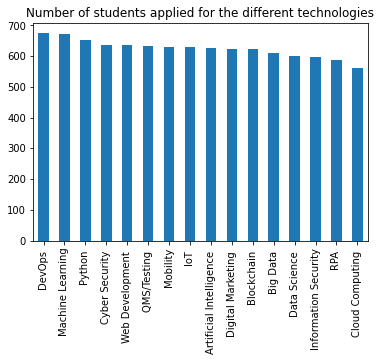

In [ ]:
file['Areas of interest'].value_counts().plot(kind = 'bar',title='Number of students applied for the different technologies')
pp.savefig(dpi=300,bbox_inches="tight")


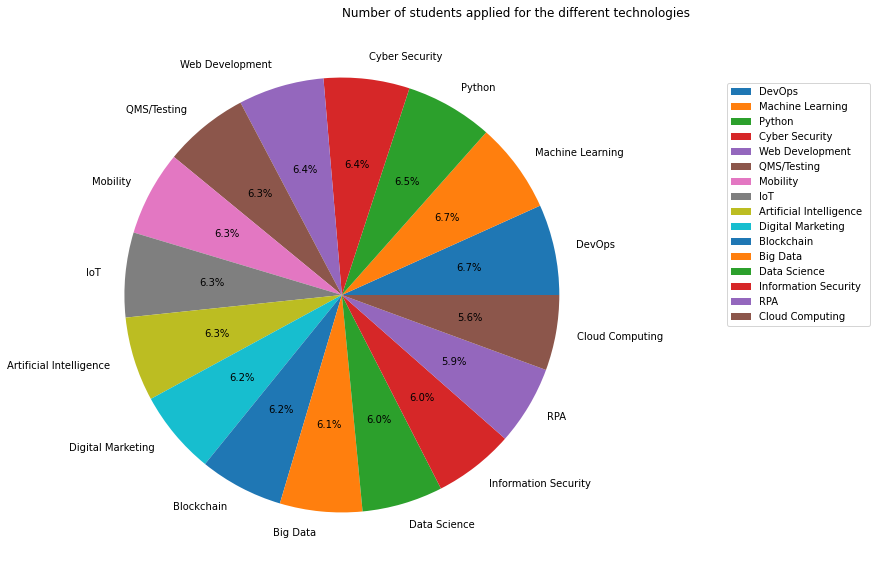

In [ ]:
plt.figure(figsize=(15,10))
file['Areas of interest'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', label='')
plt.legend(bbox_to_anchor=(1.2,0.9), loc="upper left")
title = plt.title('Number of students applied for the different technologies')
title.set_ha("left")
pp.savefig(dpi=300,bbox_inches="tight")

 ### The number of students applied for Data Science who knew ‘’Python” and who didn’t.


In [ ]:
a = file['First Name'][(file['Programming Language Known other than Java (one major)'] == 'Python') & (file['Areas of interest'] == 'Data Science ')].count()
b = file['First Name'][file['Areas of interest'] == 'Data Science '].count() - a
df = pd.DataFrame([['did not know python', b], ['knew python', a]], columns = ['python', 'students'])

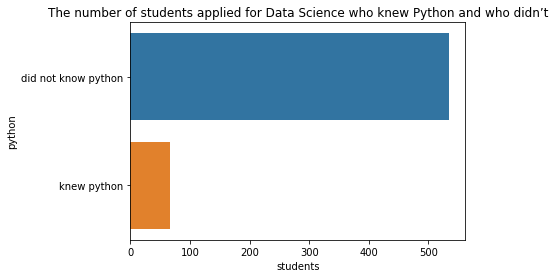

In [ ]:
fig2=sns.barplot(y="python", x="students", data=df).get_figure()
title3 = plt.title('The number of students applied for Data Science who knew Python and who didn’t')
plt.show()
pp.savefig(fig2,dpi=300,bbox_inches="tight")

### The different ways students learned about this program

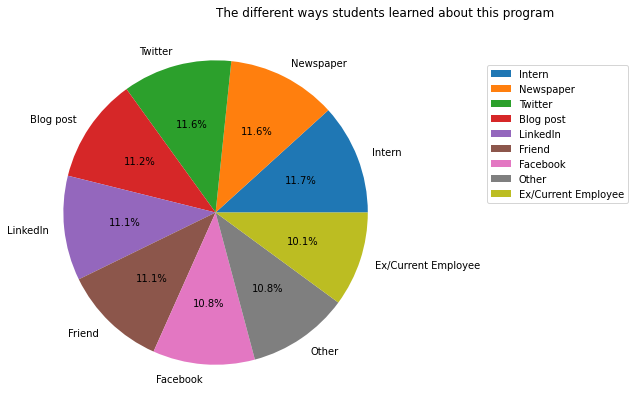

In [ ]:
plt.figure(figsize=(15,7))
file['How Did You Hear About This Internship?'].value_counts().plot(kind = 'pie',autopct='%1.1f%%', label='')
plt.legend(bbox_to_anchor=(1.2,0.9), loc="upper left")
title = plt.title('The different ways students learned about this program')
title.set_ha("left")
pp.savefig(dpi=300,bbox_inches="tight")

### Students who are in the fourth year and have a CGPA greater than 8.0.

In [ ]:
file.loc[file['CGPA/ percentage']>8.0]

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,Emergency Contact Number,College name,University Name,Degree,Major/Area of Study,Course Type,Which-year are you studying in?,CGPA/ percentage,Expected Graduation-year,Areas of interest,Current Employment Status,Have you worked core Java,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile,How Did You Hear About This Internship?,Label
1,Velma,Allone,Pune,Maharashtra,411011,23/10/1997,22,Female,vallone1@i2i.jp,2808753102,2891397791,Vishwakarma Institute of Information Technology,Savitribai Phule Pune University,B.Tech,Electronics and Telecommunication,Full-time,Fourth-year,8.73,2020,Cloud Computing,Student,Yes,PHP,No,Yes,NaN,10,7,NaN,NaN,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,6/2/1996,24,Male,tscotland2@opensource.org,2945231918,9388905869,Vidyalankar Institute of Technology,Mumbai University,B.E.,Electrical Engineering,Full-time,Fourth-year,8.61,2020,IoT,Student,Yes,C,No,No,NaN,8,6,NaN,NaN,Twitter,ineligible
5,Farlay,Anstis,Sangli,Maharashtra,416415,12/2/2000,20,Male,fanstis5@zdnet.com,8429984749,8157591558,Rajarambapu Institute of Technology,Shivaji University,B.Tech,Electrical Engineering,Full-time,Fourth-year,9.35,2020,Python,Student,Yes,PHP,Yes,No,NaN,6,7,NaN,NaN,Twitter,ineligible
6,Vanna,Keighley,Solapur,Maharashtra,413224,18/03/2000,20,Female,vkeighley6@un.org,3929498765,9665166124,Skn Sinhgad College of Engineering,Punyashlok Ahilyadevi Holkar Solapur University,B.Tech,Electronics and Telecommunication,Full-time,Third-year,8.31,2021,QMS/Testing,Student,Yes,PHP,Yes,No,NaN,10,7,NaN,NaN,Facebook,eligible
7,Vikki,Ottawell,Kolhapur,Maharashtra,416004,21/07/1998,21,Female,vottawell7@4shared.com,4906898554,1358046468,Bharati Vidyapeeth College of Engineering,Shivaji University,B.Tech,Electronics and Telecommunication,Full-time,Third-year,9.21,2021,Data Science,Student,No,C++,No,Yes,NaN,9,9,NaN,NaN,Newspaper,eligible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Leisha,Rickesies,Mumbai,Maharashtra,400059,2/4/1996,24,Female,lrickesiesrl@mac.com,6692473889,3463498767,St. Francis Institute of Technology,Mumbai University,B.E.,Computer Engineering,Full-time,Third-year,9.04,2021,Blockchain,Student,Yes,C#,No,No,NaN,8,6,NaN,NaN,Twitter,ineligible
9994,Trip,Paxton,NaviMumbai,Maharashtra,400701,19/02/1999,21,Male,tpaxtonrm@cbc.ca,7965373117,7019983369,Ramrao Adik Institute of Technology,Mumbai University,B.E.,Computer Engineering,Full-time,Second-year,9.59,2022,Blockchain,Student,Yes,HTML/CSS,No,No,NaN,8,6,NaN,NaN,Blog post,ineligible
9996,Domini,Napton,Mumbai,Maharashtra,400059,20/07/1998,21,Female,dnaptonro@deviantart.com,9365868127,6851083082,St. Francis Institute of Technology,Mumbai University,B.E.,Computer Engineering,Full-time,Third-year,8.74,2021,Cyber Security,Student,No,PHP,Yes,Yes,NaN,7,7,NaN,NaN,Friend,eligible
9997,Adoree,Westwick,Kolhapur,Maharashtra,416007,21/03/1998,22,Female,awestwickrp@example.com,7088063119,9513615061,DY Patil College of Engineering And Technology,Shivaji University,B.Tech,Electronics and Telecommunication,Full-time,Second-year,8.52,2022,IoT,Student,Yes,C++,Yes,No,NaN,7,7,NaN,NaN,Newspaper,eligible


In [ ]:
len(file[(file['Which-year are you studying in?']=="Fourth-year")&(file['CGPA/ percentage']>8.0)])

1697

In [ ]:
df = pd.DataFrame(columns = ['cgpa', 'number of students'])
df1 = file[file['CGPA/ percentage'] > 8.0]
for i in df1['CGPA/ percentage'].unique():
    df = df.append(pd.DataFrame([[i, df1['First Name'][df1['CGPA/ percentage'] == i].count()]] ,columns = ['cgpa', 'number of students']))

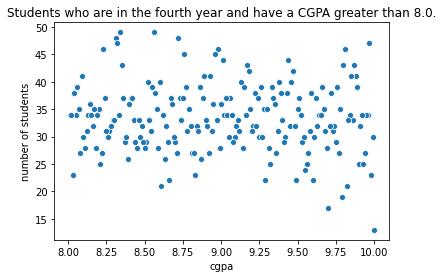

In [ ]:
title2 = plt.title('Students who are in the fourth year and have a CGPA greater than 8.0.')
fig=sns.scatterplot(y="number of students", x="cgpa", data=df).get_figure()
plt.show()
pp.savefig(fig,dpi=300,bbox_inches="tight")

### Students who applied for Digital Marketing with verbal and written communication score greater than 8. 


In [ ]:
df = pd.DataFrame(columns = ['verbal score', 'written score', 'number of students'])
df1 = file[(file['Rate your written communication skills [1-10]'] > 8) & (file['Rate your verbal communication skills [1-10]'] > 8)]
for i in [9,10]:
    for j in [9,10]:
        df = df.append(pd.DataFrame([[i, j, df1['First Name'][(df1['Rate your verbal communication skills [1-10]'] == i) & (df1['Rate your written communication skills [1-10]'] == i)].count()]] ,columns = ['verbal score', 'written score', 'number of students']))

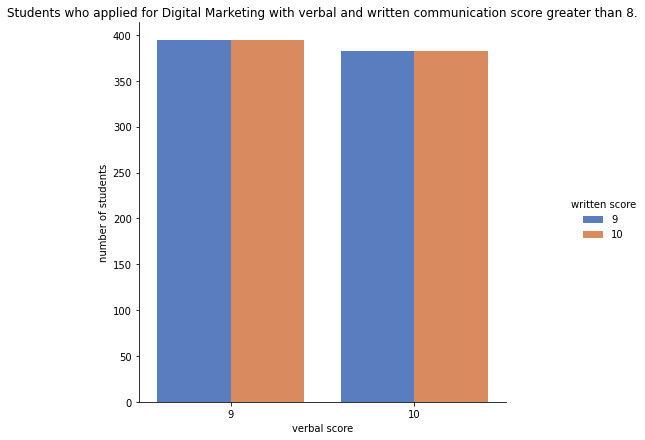

In [ ]:
fig3=sns.catplot(x="verbal score", y="number of students", hue="written score", data=df, height=6, kind="bar", palette="muted")
title4 = plt.title('Students who applied for Digital Marketing with verbal and written communication score greater than 8.')
plt.show()
pp.savefig(fig3.fig,dpi=300,bbox_inches="tight")

### Year-wise and area of study wise classification of students.

In [ ]:
df = pd.DataFrame(columns = ['year', 'students'])
for i in ['First-year', 'Second-year', 'Third-year', 'Fourth-year']:
    df = df.append(pd.DataFrame([[i, file['First Name'][file['Which-year are you studying in?'] == i].count()]], columns = ['year', 'students']))

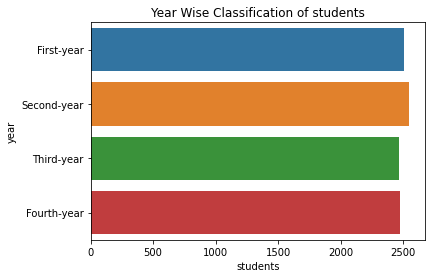

In [ ]:
title2 = plt.title('Year Wise Classification of students')
fig=sns.barplot(y="year", x="students", data=df).get_figure()
plt.show()
pp.savefig(fig,dpi=300,bbox_inches="tight")

### City wise Classification of students

In [ ]:
df = pd.DataFrame(columns = ['city', 'students'])
for i in file['City'].unique():
    df = df.append(pd.DataFrame([[i, file['First Name'][file['City'] == i].count()]], columns = ['city', 'students']))

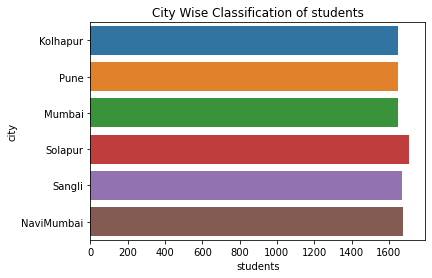

In [ ]:
title2 = plt.title('City Wise Classification of students')
fig=sns.barplot(y="city", x="students", data=df).get_figure()
plt.show()
pp.savefig(fig,dpi=300,bbox_inches="tight")

###College wise Classification of Students

In [ ]:
df = pd.DataFrame(columns = ['college', 'students'])
for i in file['College name'].unique():
    df = df.append(pd.DataFrame([[i, file['First Name'][file['College name'] == i].count()]], columns = ['college', 'students']))

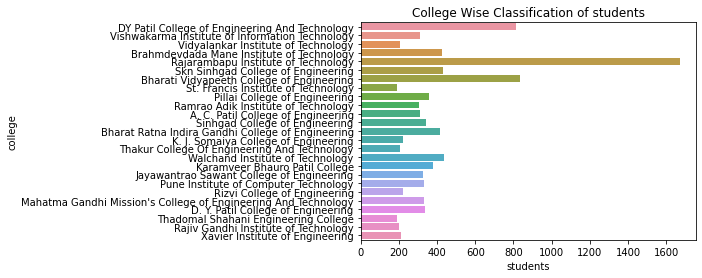

In [ ]:
title2 = plt.title('College Wise Classification of students')
fig=sns.barplot(y="college", x="students", data=df).get_figure()
plt.show()
pp.savefig(fig,dpi=300,bbox_inches="tight")

###Major wise Classification of Students

In [ ]:
df = pd.DataFrame(columns = ['Major', 'students'])
for i in file['Major/Area of Study'].unique():
    df = df.append(pd.DataFrame([[i, file['First Name'][file['Major/Area of Study'] == i].count()]], columns = ['Major', 'students']))

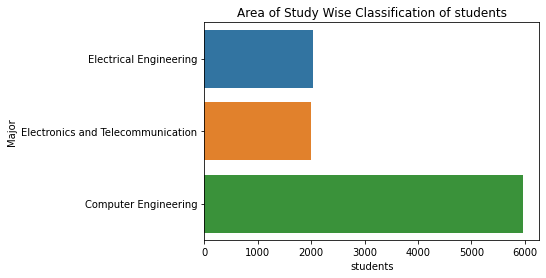

In [ ]:
title2 = plt.title('Area of Study Wise Classification of students')
fig=sns.barplot(y="Major", x="students", data=df).get_figure()
plt.show()
pp.savefig(fig,dpi=300,bbox_inches="tight")

### Plot the relationship between the CGPA and the target variable.

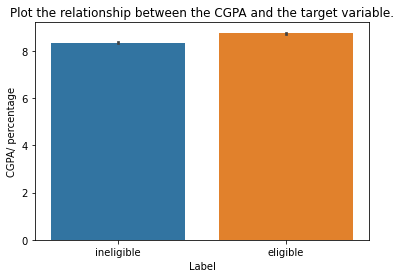

In [ ]:
fig2=sns.barplot(y="CGPA/ percentage", x="Label", data=file).get_figure()
title3 = plt.title('Plot the relationship between the CGPA and the target variable.')
plt.show()
pp.savefig(fig2,dpi=300,bbox_inches="tight")

### Plot the relationship between the Area of Interest and the target variable.

In [ ]:
df = pd.DataFrame(columns = ['Major', 'label', 'students'])
for i in file['Major/Area of Study'].unique():
    for j in file['Label'].unique():
        df = df.append(pd.DataFrame([[i, j, file['First Name'][(file['Major/Area of Study'] == i) & (file['Label'] == j)].count()]], columns = ['Major', 'label', 'students']))

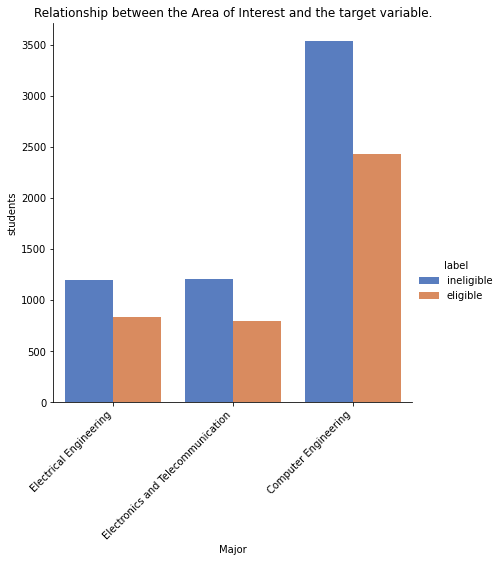

In [ ]:
fig3=sns.catplot(x="Major", y="students", hue="label", data=df, height=6, kind="bar", palette="muted")
fig3.set_xticklabels(rotation = '45', ha='right')
title4 = plt.title('Relationship between the Area of Interest and the target variable.')
plt.show()
pp.savefig(fig3.fig,dpi=300,bbox_inches="tight")

### Plot the relationship between the year of study, major, and the target variable.

In [ ]:
df = pd.DataFrame(columns = ['Areas of interest', 'year', 'label', 'students'])
for i in file['Areas of interest'].unique():
    for j in ['First-year', 'Second-year', 'Third-year', 'Fourth-year']:
        for k in file['Label'].unique():
            df = df.append(pd.DataFrame([[i, j, k, file['First Name'][(file['Areas of interest'] == i) & (file['Which-year are you studying in?'] == j) & (file['Label'] == k)].count()]], columns = ['Areas of interest', 'year', 'label', 'students']))

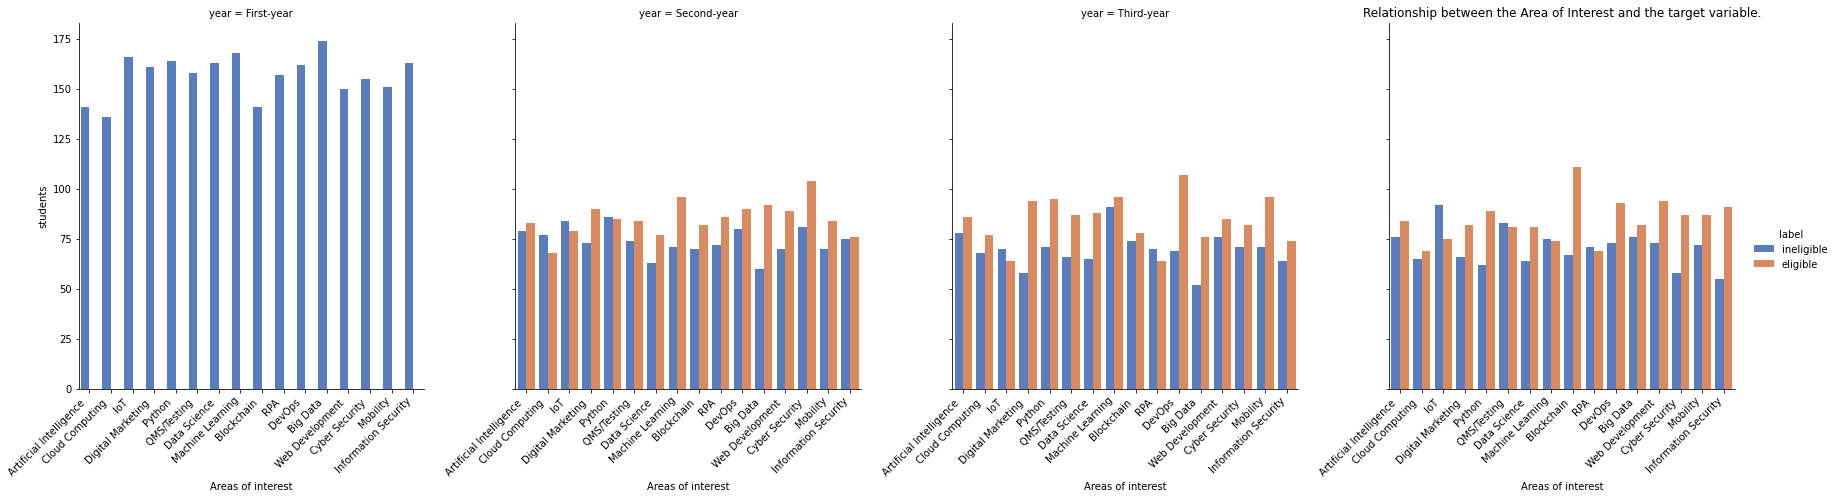

In [ ]:
fig3=sns.catplot(x="Areas of interest", y="students", hue="label", col="year", data=df, height=6, kind="bar", palette="muted")
fig3.set_xticklabels(rotation = '45', ha='right')
title4 = plt.title('Relationship between the Area of Interest and the target variable.')
plt.show()
pp.savefig(fig3.fig,dpi=300,bbox_inches="tight")

In [ ]:
pp.close()